In [1]:
#import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load the digits dataset: digits
digits = datasets.load_digits()

In [3]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

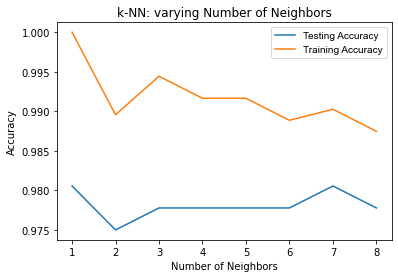

In [4]:
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter

plt_n=[]
plt_test_score=[]
plt_train_score=[]

for i in range(1,9):
    #if i % 2 == 1:
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train,y_train)
    plt_n.append(i)
    plt_train_score.append(kNN.score(X_train,y_train))
    plt_test_score.append(kNN.score(X_test,y_test))
    #if i == 3:
        #kNN_acc=(kNN.score(X_test,y_test)/kNN.score(X_train,y_train))
        #print("{:.3f}".format(kNN_acc))
        #print(kNN_acc)



fig,ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.plot(plt_n, plt_test_score, label = 'Testing Accuracy')
ax.plot(plt_n, plt_train_score, label = 'Training Accuracy')   


plt.xlabel("Number of Neighbors")
plt.ylabel('Accuracy')
plt.title('k-NN: varying Number of Neighbors')

font = font_manager.FontProperties(family='Arial',
                                   style='normal')
ax.legend(prop=font)

plt.show()

### According to the above line graph, k=3 is the best fit. While k=3, Testing Accuracy and Training Accuracy are both high.

Note:when choosing an even number, there may be a tie, and then it is impossible or random to return a classification, which is uncertain. Generally avoid this situation and use k odd.

In [5]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train) 
y_pred=kNN.predict(X_test)
kNN_acc=accuracy_score(y_test,y_pred)
#print(kNN_acc)

In [6]:
svc=SVC(kernel="linear")#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      1.00      0.94        42
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        26
           5       1.00      0.97      0.98        32
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.98        33
           8       1.00      0.89      0.94        46
           9       0.97      1.00      0.99        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [7]:
svc=SVC(kernel="rbf")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        26
           5       1.00      0.97      0.98        32
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.98        33
           8       1.00      0.96      0.98        46
           9       0.97      1.00      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [8]:
svc=SVC(kernel="poly")
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
svc_acc=accuracy_score(y_test,y_pred)
#print(svc_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        26
           5       1.00      0.97      0.98        32
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.98        33
           8       1.00      0.96      0.98        46
           9       0.97      1.00      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### Conclusion:  For all of the three kernels,The indicators of the precision, recall, f1-score , accuracy, macro avg and weighted avg are all more than 95%. In this case, We choose kernel poly.( we choose higher accuracy and higher precision,recall and f1-score)

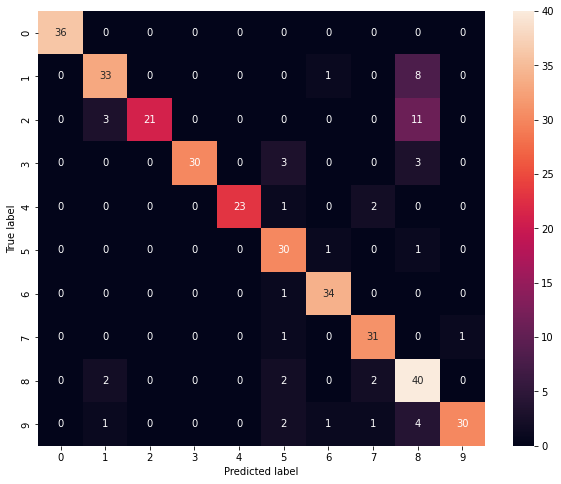

In [9]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)
y_pred = bayes. predict(X_test)
    
accuracy_matrix = confusion_matrix(y_test,y_pred)
#print(accuracy_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(accuracy_matrix,annot=True)
    
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [10]:
total_acc=0
i_acc=0
for i in range(0,10):
    #print("{} {}".format(accuracy_matrix[i,i],np.sum(accuracy_matrix,axis=1)[i]))
    i_acc = accuracy_matrix[i,i]/np.sum(accuracy_matrix,axis=1)[i]
    total_acc = total_acc + i_acc
    print("The accuracy of number {} is:{:.2f}".format(i,i_acc))
          
#bayes_acc=float("{:.2f}".format(total_acc/10))
bayes_acc=total_acc/10
#print(bayes_acc)

The accuracy of number 0 is:1.00
The accuracy of number 1 is:0.79
The accuracy of number 2 is:0.60
The accuracy of number 3 is:0.83
The accuracy of number 4 is:0.88
The accuracy of number 5 is:0.94
The accuracy of number 6 is:0.97
The accuracy of number 7 is:0.94
The accuracy of number 8 is:0.87
The accuracy of number 9 is:0.77


### Conclusion: The number 2 and 9 have very low accuracy. If we look at the heatmap, we can easily know that number 2 is mistaken for 8 and number 9 is mistaken for 7 and 8.

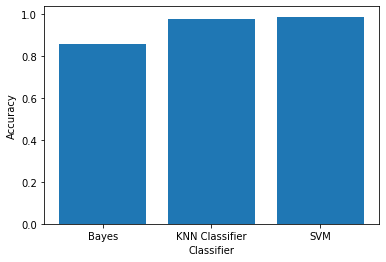

In [11]:
fig,ax = plt.subplots()
xValue = ['Bayes', 'KNN Classifier', 'SVM']
yValue = [bayes_acc,kNN_acc,svc_acc]

ax.bar(xValue,yValue)

plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.show()

In [12]:
import pandas as pd
df=pd.read_csv("gapminder.csv")
df.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

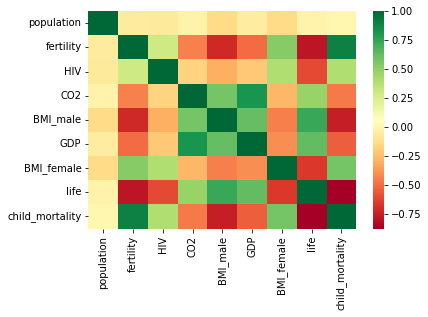

In [13]:
#df.corr()
sns.heatmap(df.corr(), cmap="RdYlGn")

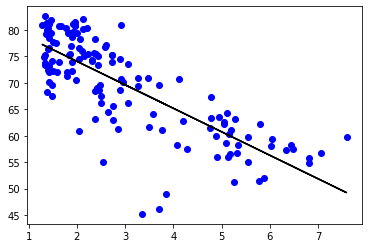

In [14]:
from sklearn.linear_model import LinearRegression

X_train = df[["fertility"]]
y_train = df["life"]
#print(X_train)
#print(X_train[:,None])
reg = LinearRegression()
reg.fit(X_train,y_train)

plt.plot(X_train,y_train,"bo")
plt.plot(X_train,reg.predict(X_train),"k-")


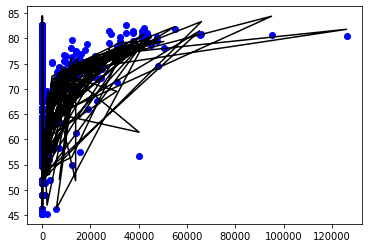

In [15]:
X_train_all = df[['fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality']]
y_train_all = df["life"]
reg_all=LinearRegression()
reg_all.fit(X_train_all,y_train_all)

plt.plot(X_train_all,y_train_all,"bo")
plt.plot(X_train_all,reg_all.predict(X_train_all),"k-")


In [16]:
print(reg.score(X_train,y_train))
print(reg_all.score(X_train_all,y_train_all))

0.6192442167740035
0.8974995317332959


### Conclusion: The model with all features has a higher model score, which means that apart from fertility, there are other features that are highly relevant to life.

In [17]:
from numpy import mean
from numpy import std
reg_score=cross_val_score(reg,X_train,y_train,cv=5)
reg_all_score= cross_val_score(reg_all,X_train_all,y_train_all) # default cv=5
# report performance
print('Accuracy with fertility: %.3f (%.3f)' % (mean(reg_score), std(reg_score)))
print('Accuracy with all features: %.3f (%.3f)' % (mean(reg_all_score), std(reg_all_score)))

Accuracy with fertility: 0.617 (0.094)
Accuracy with all features: 0.863 (0.053)


### Conclusion: We can see that the model with all features achieved an estimated classification accuracy of about 86.3 percent. The accuracy is more higher than model with fertility, and also have smaller deviation.

In [18]:
df=pd.read_csv("creditcard.csv")
print(df.shape)
df.head(5)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Class')

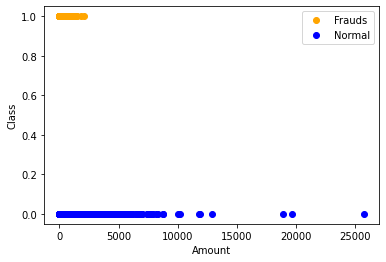

In [19]:
frauds =df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
plt.plot(frauds.Amount,frauds.Class,'o',color='orange',label='Frauds')
plt.plot(non_frauds.Amount,non_frauds.Class,'o',color='Blue',label='Normal')
plt.legend()
plt.xlabel("Amount")
plt.ylabel("Class")
#print(len(frauds),"frauds,",len(non_frauds),"nonfrauds.")

### Conclusion：The amount of All frauds are less than 2500. Users tend to make small transactions。

[[284259     56]
 [   188    304]]


<AxesSubplot:>

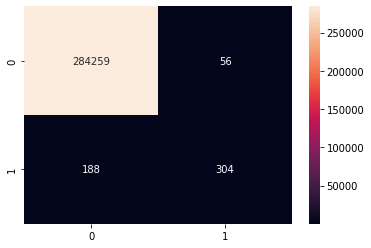

In [20]:
#logistic regression
X=df.drop("Class",axis=1)
y=df.Class

log_regression = LogisticRegression(solver='lbfgs',max_iter=500)
log_regression.fit(X,y)
y_pred= log_regression.predict(X)
conf_matrix=confusion_matrix(y,y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True,fmt='d')
